#Project Outline

Di project kali ini kami akan mencari insight dari data nilai mahasiswa dengan nama variabel masing-masing 'number_courses', 'time_study', dan 'Marks'. Dari data tersebut kami akan melakukan Data Loading, Data Preprocessing, Exploratory Data Analysis, dan membuat model Linear Regression untuk memprediksi nilai mahasiswa tersebut.

Dari informasi yang kami dapatkan, kami akan mencari insight yang diberikan ke rektor agar beliau dapat menerapkan sistem pembelajaran yang efektif kedepannya.

# Data Preparation

### Data Loading

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#file_path = '/content/drive/MyDrive/Final Project GDSC/Copy of Student_Marks.csv'
file_path = 'Copy of Student_Marks.csv'
df = pd.read_csv(file_path)
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


### Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [ ]:
df.nunique()

number_courses      6
time_study        100
Marks             100
dtype: int64

In [ ]:
df.shape

(100, 3)

#Exploratory Data Analysis

### Any missing values?

In [ ]:
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

### Any outliers?

In [ ]:
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].tolist()
    return outliers

# Memanggil fungsi untuk mendeteksi outlier
outliers = detect_outliers_iqr(df)
print("Outliers detected using IQR method:")
print(outliers)

Outliers detected using IQR method:
{'number_courses': [], 'time_study': [], 'Marks': []}


### Any duplicates?

In [ ]:
df.duplicated().sum()

0

### Univariate Analysis

<Axes: xlabel='number_courses', ylabel='count'>

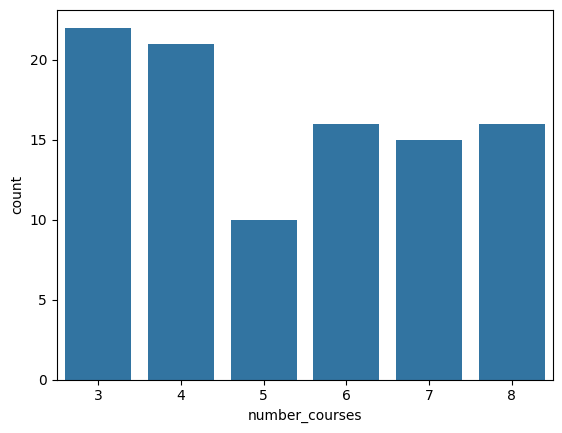

In [ ]:
sns.countplot(data=df,x="number_courses")

In [ ]:
df['number_courses'].value_counts()

3    22
4    21
6    16
8    16
7    15
5    10
Name: number_courses, dtype: int64

Dari grafik di atas, terlihat bahwa jumlah mahasiswa yang mengambil 3 mata kuliah adalah yang tertinggi dari semua kategori jumlah mata kuliah (22 Mahasiswa mengambil 3 mata kuliah).

Rata-rata waktu belajar mahasiswa: 4.07714


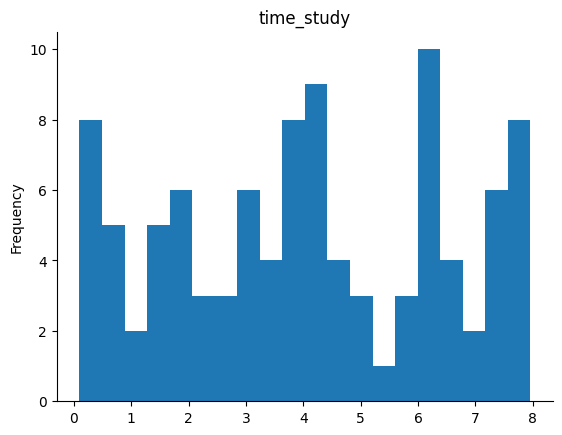

In [ ]:
df['time_study'].plot(kind='hist', bins=20, title='time_study')
plt.gca().spines[['top', 'right',]].set_visible(False)
print('Rata-rata waktu belajar mahasiswa:', df['time_study'].mean())

Dari grafik diatas, terlihat bahwa frekuensi rata-rata waktu belajar mahasiswa terbesar berada di sekitar 6 jam. Dan lebih dari 10 orang punya waktu belajar kurang dari 1 jam.

Rata-rata nilai mahasiswa: 24.417689999999997


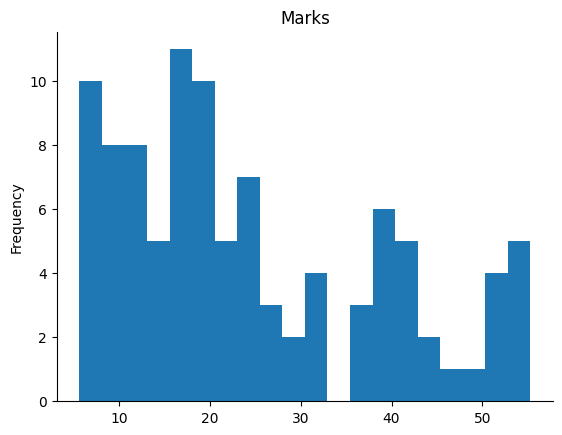

In [ ]:
df['Marks'].plot(kind='hist', bins=20, title='Marks')
plt.gca().spines[['top', 'right',]].set_visible(False)
print('Rata-rata nilai mahasiswa:', df['Marks'].mean())

Dari grafik diatas, terlihat bahwa frekuensi rata-rata nilai mahasiswa terbesar berada di sekitar 15. Dan lebih dari 50 persen mahasiswa punya nilai rata rata di bawah 30.

### Bivariate Analysis

#### Marks vs. number_courses

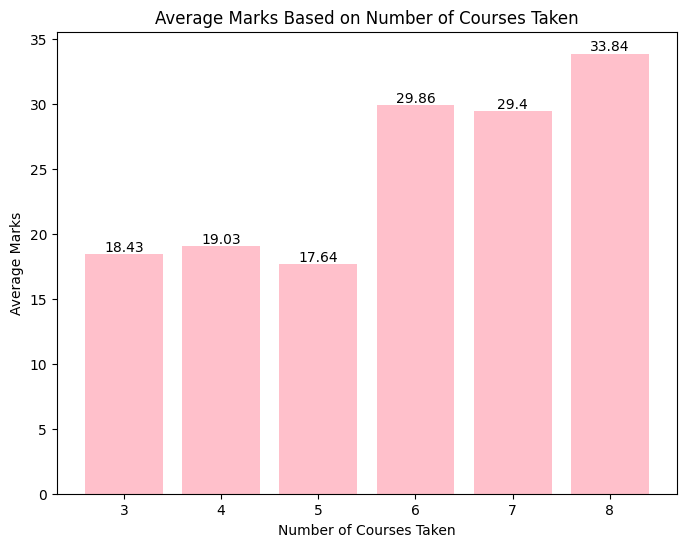

In [ ]:
average_marks = df.groupby('number_courses')['Marks'].mean().reset_index()

# Membuat bar plot menggunakan matplotlib
plt.figure(figsize=(8, 6))
bars = plt.bar(average_marks['number_courses'], average_marks['Marks'], color='pink')
plt.title('Average Marks Based on Number of Courses Taken')
plt.xlabel('Number of Courses Taken')
plt.ylabel('Average Marks')

# Menambahkan label di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.show()

Dari grafik di atas, terlihat bahwa rata-rata nilai tertinggi terjadi pada mahasiswa yang mengambil 8 mata kuliah.

Mahasiswa yang mengambil jumlah mata kuliah lebih dari 6, punya nilai rata rata yang lebih tinggi dibanding dengan mahasiswa yang mengambil jumlah mata kuliah kurang dari 5.

#### Marks vs. time_study

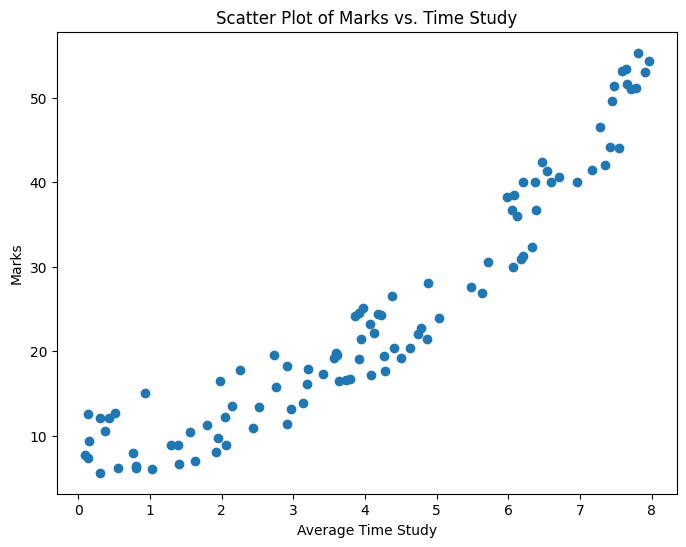

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['time_study'], df['Marks'])
plt.title('Scatter Plot of Marks vs. Time Study')
plt.xlabel('Average Time Study')
plt.ylabel('Marks')
plt.show()

Dari grafik diatas, terlihat jelas bahwasannya rata-rata lama waktu belajar mahasiswa punya pengaruh yang signifikan terhadap nilai mahasiswa. Semakin banyaknya waktu belajar, maka semakin tinggi juga nilai yang mahasiswa dapatkan.

### Multivariate Analysis

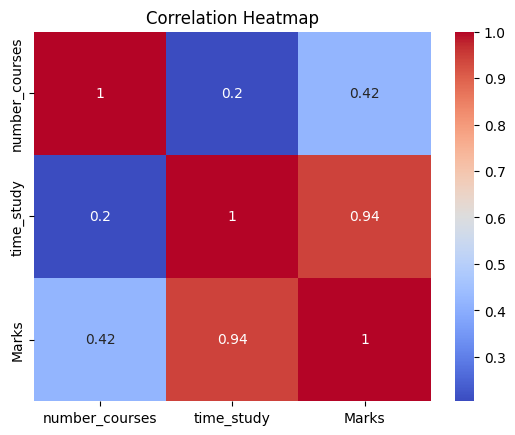

In [ ]:
correlation_matrix = df.corr()

# Membuat heatmap untuk visualisasi korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

Dari grafik diatas, terlihat bahwa waktu belajar mahasiswa dengan nilai mahasiswa mempunyai korelasi yang kuat, yaitu sebesar 0.94.

Dan banyaknya jumlah mata kuliah yang diambil oleh mahasiswa, punya pengaruh terhadap nilai rata-rata mahasiswa meskipun pengaruhnya tidak sebesar 'waktu belajar', yang bisa dilihat dari nilai korelasinya sebesar 0.42.

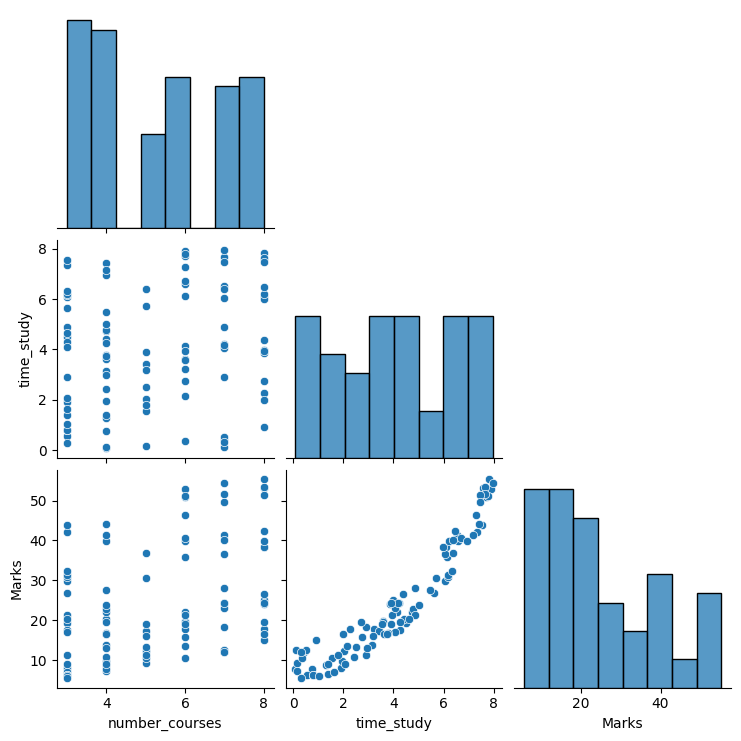

In [ ]:
sns.pairplot(data=df , corner=True)
plt.show()

# Creating Model

In [ ]:
# Memisahkan fitur dan target
X = df.drop(columns='Marks')
y = df['Marks']

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat model linear regression
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Memprediksi nilai y untuk data uji
y_pred = model.predict(X_test)

In [ ]:
comparison_result = {'y_predict': y_pred, 'y_actual': y_test}
pd.DataFrame(comparison_result)

,y_predict,y_actual
83,19.202358,16.106
53,38.097654,36.653
70,20.149827,16.606
45,9.384935,8.924
44,10.722805,9.742
39,45.324513,51.142
22,13.139863,12.209
80,48.191233,54.321
10,37.380333,42.036
0,22.329897,19.202


# Model Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Nilai R Square:", r2)

Mean Squared Error (MSE): 13.104475429070757
Mean Absolute Error (MAE): 3.0284743686391673
Nilai R Square: 0.9417542675032117


Dari matriks evaluasi di atas bisa kita lihat bahwa nilai MSE adalah 13.10. Ini menunjukkan kuadrat dari error rata-rata antara nilai mahasiswa yang diprediksi dan nilai mahasiswa yang sebenarnya adalah sekitar 13.10. Lalu nilai dari MAE adalah 3.02. Ini menunjukkan rata-rata dari perbedaan absolut antara nilai mahasiswa yang diprediksi dan nilai mahasiswa yang sebenarnya adalah sekitar 3.02.
Semakin rendah MSE dan MAE, semakin baik performa model dalam memprediksi nilai mahasiswa.

Nilai R Square sebesar 0.94, ini menunjukkan bahwa sekitar 94% variabilitas dalam nilai mahasiswa dapat dijelaskan oleh fitur-fitur yang digunakan dalam model. Semakin tinggi nilai R Square, semakin baik model dalam menjelaskan variabilitas data.

### Cross Validation

In [ ]:
mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Rata-Rata MSE:", mse_scores.mean())
print("Rata-Rata MAE:", mae_scores.mean())
print('Rata-rata R Square:', r2_scores.mean())

Rata-Rata MSE: 12.924567708609391
Rata-Rata MAE: 3.1449604943682297
Rata-rata R Square: 0.9325393590266863


# Model Saved

In [ ]:
saved_path_file = '/content/drive/MyDrive/Final Project GDSC/student_score_prediction.pkl'
with open(saved_path_file,'wb') as f:
  pickle.dump(model, f)

# Summary



*   Waktu belajar mahasiswa memiliki pengaruh yang sangat besar terhadap nilai yang diperoleh. Nilai korelasi variabel 'time_study' terhadap variabel 'marks' sebesar 0.94 menunjukkan hubungan positif yang kuat antara waktu belajar dan nilai. Semakin lama waktu belajar, kemungkinan nilai yang diperoleh akan semakin tinggi.
*   Ternyata banyaknya mata kuliah yang diambil memiliki pengaruh terhadap nilai yang diperoleh. Nilai korelasi sebesar 0.42 menunjukkan hubungan positif antara jumlah mata kuliah dan nilai. Meskipun korelasinya tidak sangat kuat, tetapi tetap menunjukkan bahwa semakin banyak mata kuliah yang diambil, kemungkinan nilai yang lebih tinggi dapat diperoleh.
*   Model linear regression yang dibuat memiliki kinerja yang relatif baik dalam memprediksi nilai mahasiswa, dengan nilai MSE (13.10) dan MAE (3.02) yang cukup rendah.
*   Nilai R Square yang tinggi (0.93) menunjukkan bahwa model kita dapat menjelaskan sebagian besar variasi dalam nilai rata-rata mahasiswa, atau dengan kata lain sekitar 93% variasi dalam nilai dapat dijelaskan oleh fitur-fitur yang digunakan dalam model.

# Insight & Recomendation


*   Karena waktu belajar mahasiswa memiliki pengaruh yang sangat besar terhadap nilai yang diperoleh, penting bagi universitas untuk memastikan bahwa mahasiswa memiliki akses dan kesempatan untuk belajar dengan waktu yang memadai. Rektor dapat mempertimbangkan untuk mengimplementasikan kebijakan atau program yang mendukung pembelajaran aktif di luar kelas, seperti **kelas tambahan**, **bimbingan akademik**, atau **sumber daya belajar online selain mata kuliah wajib di dalam kelas**.
*   Meskipun korelasi antara jumlah mata kuliah yang diambil dan nilai tidak sangat kuat, masih ada hubungan positif antara keduanya. Oleh karena itu, r**ektor dapat mempertimbangkan untuk memastikan bahwa jumlah mata kuliah yang diambil oleh mahasiswa sesuai dengan kapasitas dan kemampuan mereka**. Ini dapat dilakukan dengan** memastikan adanya bimbingan akademik yang memadai dan memperhatikan beban kuliah mahasiswa agar tidak terlalu berat**.
*   Model masih memiliki keterbatasan dalam memprediksi nilai mahasiswa. Karena fitur yang digunakan hanya banyaknya jumlah mata kuliah yang diambil dan waktu belajar mahasiswa. **Rektor dapat melakukan analisis lebih lanjut terhadap faktor-faktor lainnya yang menyebabkan nilai mahasiswa menjadi rendah atau tinggi**.

